In [1]:
from load_data import load_data
import matplotlib.pyplot as plt

2023-07-08 13:23:09.769251: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
x_train, Y_train, x_test, Y_test = load_data()

# flattening images
X_train = x_train.reshape(len(x_train), -1)
X_test = x_test.reshape(len(x_test), -1)

In [9]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
179/179 [==============================] - 120s 661ms/step - loss: 3.7017 - accuracy: 0.4715
Epoch 2/10
179/179 [==============================] - 139s 779ms/step - loss: 0.8768 - accuracy: 0.6346
Epoch 3/10
179/179 [==============================] - 128s 715ms/step - loss: 0.7280 - accuracy: 0.7174
Epoch 4/10
179/179 [==============================] - 113s 632ms/step - loss: 0.6872 - accuracy: 0.7314
Epoch 5/10
179/179 [==============================] - 118s 656ms/step - loss: 0.6104 - accuracy: 0.7581
Epoch 6/10
179/179 [==============================] - 115s 642ms/step - loss: 0.5615 - accuracy: 0.7840
Epoch 7/10
179/179 [==============================] - 134s 751ms/step - loss: 0.5408 - accuracy: 0.7889
Epoch 8/10
179/179 [==============================] - 163s 913ms/step - loss: 0.5034 - accuracy: 0.8057
Epoch 9/10
179/179 [==============================] - 179s 1s/step - loss: 0.4628 - accuracy: 0.8263
Epoch 10/10
179/179 [==============================] - 140s 783ms/s

Text(0.5, 0, 'Epoch')

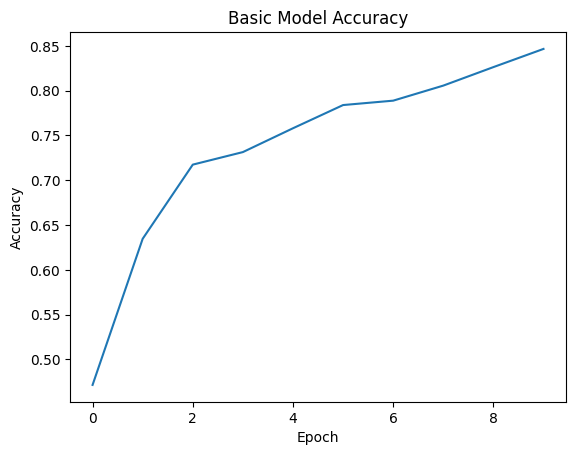

In [11]:
plt.title("Basic Model Accuracy")
plt.plot(history.history['accuracy'])
plt.ylabel("Accuracy")
plt.xlabel("Epoch")

In [12]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(dict(zip(model.metrics_names, score)))

{'loss': 0.6454951763153076, 'accuracy': 0.766590416431427}
